In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Train=pd.read_csv("/home/nikesh/Documents/missionDSG/mushroom_train.csv")
Train.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,...,p,w,p,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,...,w,w,p,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,...,e,e,p,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,...,p,w,p,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,...,w,w,p,w,36,o,p,n,s,m
5,p,x,f,y,f,f,f,c,b,h,...,p,n,p,w,23,o,l,h,y,g
6,e,f,s,g,f,n,f,w,b,p,...,w,w,p,w,43,o,e,n,a,g
7,e,f,f,n,t,n,f,c,b,u,...,g,w,p,w,25,o,p,n,v,d
8,p,x,y,e,f,f,f,c,n,b,...,p,p,p,w,50,o,e,w,v,p
9,p,x,s,g,t,f,f,c,b,h,...,w,w,p,w,47,o,p,h,v,g


# ANALYZING THE DATA

In [3]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Data columns (total 25 columns):
class                       5686 non-null object
cap-shape                   5686 non-null object
cap-surface                 5686 non-null object
cap-color                   5686 non-null object
bruises                     5686 non-null object
odor                        5686 non-null object
gill-attachment             5686 non-null object
gill-spacing                5686 non-null object
gill-size                   5686 non-null object
gill-color                  5686 non-null object
stalk-shape                 5686 non-null object
stalk-root                  5686 non-null object
radius                      5686 non-null int64
stalk-surface-above-ring    5686 non-null object
stalk-surface-below-ring    5686 non-null object
stalk-color-above-ring      5686 non-null object
stalk-color-below-ring      5686 non-null object
veil-type                   5686 non-null object
veil-color  

As shown above we have 25 columns out of which 24 columns represent features and the class column represents mushroom type(edible or poisionous) and we have 5686 entries. Also there are two int data types and rest are object and none have null values.

In [4]:
Train["class"].unique()

array(['p', 'e'], dtype=object)

we have two classifications of mushroom namely- edible(e) and poisionous(p).

In [5]:
Train["class"].value_counts()

e    2945
p    2741
Name: class, dtype: int64

Our data have 2945 examples of edible mushrooms and 2741 examples of poisionous mushrooms.

In [6]:
Train.describe()


,radius,weight
count,5686.000000,5686.000000
mean,202.627682,33.012487
std,350.213032,13.379082
min,1.000000,0.000000
25%,38.000000,23.000000
50%,129.000000,27.000000
75%,259.000000,40.000000
max,3500.000000,102.000000


weight minimum is zero which is not feasible and thus weight column has some incorrect values.

In [7]:
count=0
for i in Train['weight']:
    if i==0:
        count=count+1
print(count)

51


we have 51 zero entries in weight column. 

In [8]:
#since 51 values in weihgt column in Train data are wrong(=0).
#Therefore we will replace them by the mean of weights(approx=33).

Train['weight']=Train['weight'].replace([0],33)

In [9]:
Train['weight'].describe()

count    5686.000000
mean       33.308477
std        13.005208
min         5.000000
25%        23.000000
50%        28.000000
75%        40.000000
max       102.000000
Name: weight, dtype: float64

Now the weight minimum is 5 after replacing zero entries with mean of weight(approx 33).
NOTE : we can't simply left the data with zero weight entries as this will lead to loss of data of other features.

In [10]:
Train['veil-type'].unique()

array(['p'], dtype=object)

Since veil-type has only one attribute('p').
Therefore its a useless feature for training model and to save time and memory lets remove it

In [11]:
#dropping veil-type column
Train=Train.drop('veil-type',axis=1)
Train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,...,k,p,w,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,...,s,w,w,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,...,s,e,e,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,...,s,p,w,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,...,s,w,w,w,36,o,p,n,s,m


The above data frame doesn't contain veil-type feature(column).

In [12]:
Train.shape

(5686, 24)

# PLOTTING REGESSION, BAR GRAPHS AND PIE CHARTS TO GET INSIGHTS OF DATA

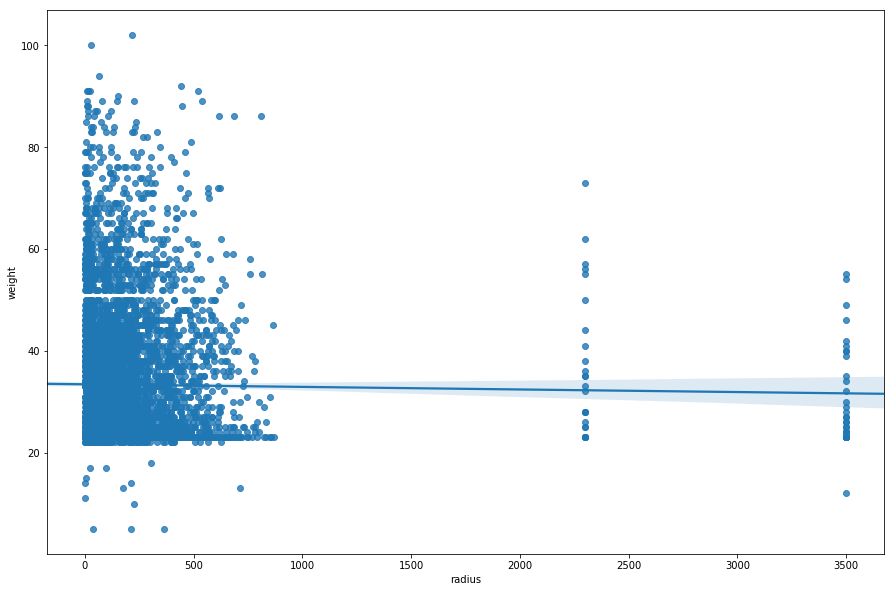

In [13]:
#plotiing a regression  plot between radius and weight of mushrooms
plt.figure(figsize=(15,10))
sns.regplot(x="radius",y="weight",data=Train)
plt.show()

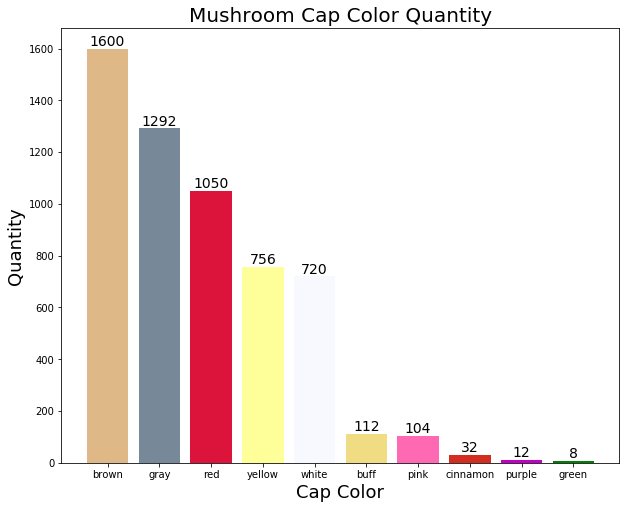

In [14]:
#Obtain total number of mushrooms for each 'cap-color'

cap_colors = Train['cap-color'].value_counts()
m_height = cap_colors.values.tolist() 
cap_colors.axes 
cap_color_labels = cap_colors.axes[0].tolist() 

#PLOT Preparations and Plotting

ind = np.arange(10)  
width = 0.8        
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
fig, ax = plt.subplots(figsize=(10,8))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)


#Add some text for labels, title and axes ticks

ax.set_xlabel("Cap Color",fontsize=18)
ax.set_ylabel('Quantity',fontsize=18)
ax.set_title('Mushroom Cap Color Quantity',fontsize=20)
ax.set_xticks(ind) 
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 10)


#Auto-labels the number of mushrooms for each bar color.
def autolabel(rects,fontsize=14):
    
    #Attach a text label above each bar displaying its height
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)        
plt.show() 

Most abundant mushroom color types are - brown , gray, red, yellow and white  while buff, pink, purple, green are least occuring mushroom color types.

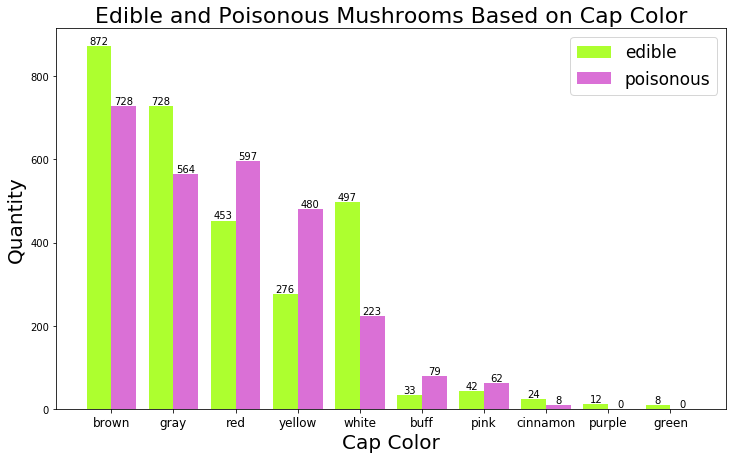

In [15]:
#comparing quantities of edible and poisionous mushrooms on basis of cap color


poisonous_cc = []
edible_cc = []   

for capColor in cap_color_labels:
    size = len(Train[Train['cap-color'] == capColor].index)
    edibles = len(Train[(Train['cap-color'] == capColor) & (Train['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        

#PLOT Preparations and Plotting

ind = np.arange(10) 
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#DA70D6')


#Add some text for labels, title and axes ticks

ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)

ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()

Except purple and green(although they have very few eamples) all other cap colors are present in both edible and poisionous classes. Therefore a mushroom having green and purple (rare to find) have a good probabilty to be edible.

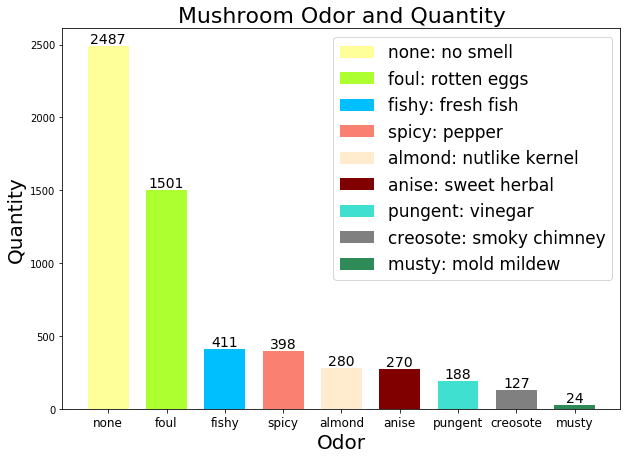

In [16]:
#plotting bar garph for mushroom odor


#Obtain total number of mushrooms for each 'odor'

odors = Train['odor'].value_counts()
odor_height = odors.values.tolist()
odor_labels = odors.axes[0].tolist() 


#PLOT Preparations and Plotting

width = 0.7 
ind = np.arange(9)  
colors = ['#FFFF99','#ADFF2F','#00BFFF','#FA8072','#FFEBCD','#800000','#40E0D0','#808080','#2E8B57']

fig, ax = plt.subplots(figsize=(10,7))
odor_bars = ax.bar(ind, odor_height , width, color=colors)


#Add some text for labels, title and axes ticks

ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Odor and Quantity',fontsize=22)
ax.set_xticks(ind)
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend(odor_bars, ['none: no smell','foul: rotten eggs', 'fishy: fresh fish','spicy: pepper',
                      'almond: nutlike kernel', 'anise: sweet herbal', 'pungent: vinegar',
                     'creosote: smoky chimney', 'musty: mold mildew'],fontsize=17)
autolabel(odor_bars)        
plt.show()

Most of the mushrooms are having either no odor or foul (rotten eggs) odor.

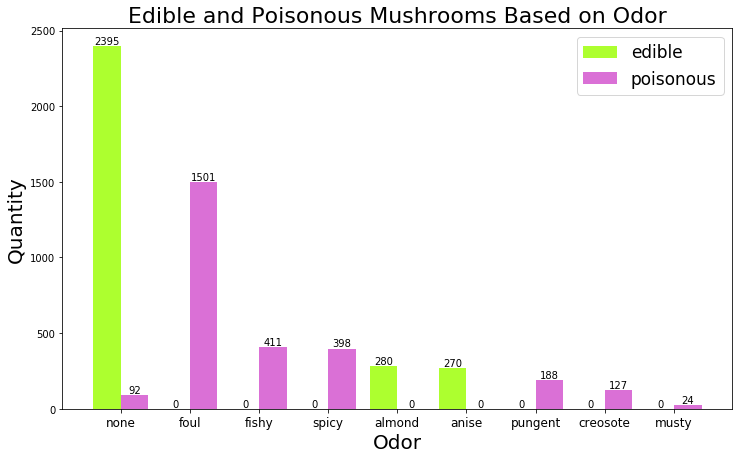

[2395, 0, 0, 0, 280, 270, 0, 0, 0]
[92, 1501, 411, 398, 0, 0, 188, 127, 24]


In [17]:
#comparing quantities of edible and poisionous mushrooms on basis of odor


poisonous_od = []
edible_od = []   
for odor in odor_labels:
    size = len(Train[Train['odor'] == odor].index)
    edibles = len(Train[(Train['odor'] == odor) & (Train['class'] == 'e')].index)
    edible_od.append(edibles)
    poisonous_od.append(size-edibles)
                        
#PLOT Preparations and Plotting

width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_od , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_od , width, color='#DA70D6')


#Add some text for labels, title and axes ticks

ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Odor',fontsize=22)
ax.set_xticks(ind + width / 2) 
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible_od)
print(poisonous_od)

Its clear from above plot that odor is a very good parameter to distinguish mushrooms into edible and poisionous classes. If a mushroom smells like almond, anise,or doesn't have any smell then it has a strong probability to be edible while if it has foul, fishy, spicy, pungent , crestole , musty smell they are likely to be poisionous.

[2814 1219  877  279  255  242]


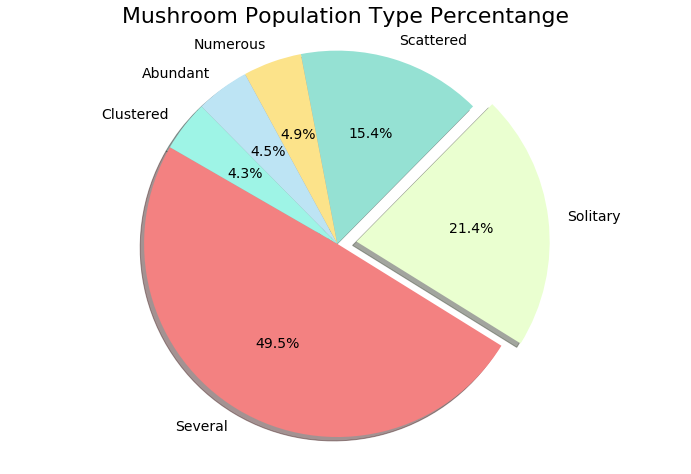

In [18]:
#GET THE POPULATION TYPE AND ITS VALUES ON A SINGLE PIE CHART

populations = Train['population'].value_counts()
pop_size = populations.values
pop_types = populations.axes[0]
print(pop_size)

# Data to plot

pop_labels = 'Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'
colors = ['#F38181','#EAFFD0','#95E1D3','#FCE38A','#BDE4F4','#9EF4E6']
fig = plt.figure(figsize=(12,8))

# Plot

plt.title('Mushroom Population Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=(0, 0.1, 0, 0, 0, 0) , labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)

for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

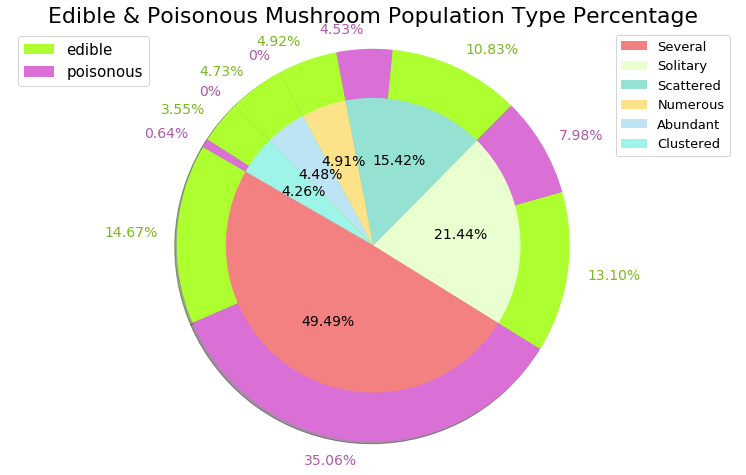

In [19]:
#COMPARING QUANTITIES OF EDIBLE AND POISIONOUS MUSHROOMS BASED ON THEIR POPULATION TYPE ON A DOUBLE PIE CHART

poisonous_pop = [] 
edible_pop = []    

for pop in pop_types: 
    size = len(Train[Train['population'] == pop].index)
    edibles = len(Train[(Train['population'] == pop) & (Train['class'] == 'e')].index)
    edible_pop.append(edibles) 
    poisonous_pop.append(size-edibles) 
    combine_ed_poi = []

for i in range(0,len(edible_pop)):  
    combine_ed_poi.append(edible_pop[i])
    combine_ed_poi.append(poisonous_pop[i])


#Preparations for DOUBLE pie chart.

fig = plt.subplots(figsize=(13,8))
plt.title('Edible & Poisonous Mushroom Population Type Percentage', fontsize=22)
percentages_e_p = ['14.67%','35.06%','13.10%', '7.98%','10.83%','4.53%','4.92%','0%','4.73%','0%',
                  '3.55%','0.64%'] #Percetanges for edible and poisonous
#First pie
patches1, texts1 = plt.pie(combine_ed_poi,radius = 2, labels= percentages_e_p,
                                colors=['#ADFF2F','#DA70D6'], shadow=True, startangle=150)
for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#7CB721') 
    else:
        texts1[i].set_color('#AE59AB') 
    texts1[i].set_fontsize(14)         

#Second pie

patches2, texts2, autotexts2 = plt.pie(pop_size, colors=colors, radius = 1.5,
        autopct='%1.2f%%', shadow=True, startangle=150,labeldistance= 2.2)
for aut in autotexts2:
    aut.set_fontsize(14)  
    aut.set_horizontalalignment('center') 

#Set 2 Legends to the plot.
first_legend   = plt.legend(patches1, ['edible','poisonous'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, pop_labels, loc="best",fontsize=13)
plt.gca().add_artist(first_legend) 

#Align both pie charts in the same position

plt.axis('equal')
plt.show()

IF FOUND A MUSHROOM IN A POPULATION TYPE - CLUSTERED, ABUNDANT , NUMEROUS IT HAS A STRONG PROBABILITY TO BE IN EDIBLE CLASS WHILE OTHER POPULATION TYPES ARE NOT MUCH CLEAR. 

d    2227
g    1500
p     798
l     568
u     256
m     198
w     139
Name: habitat, dtype: int64


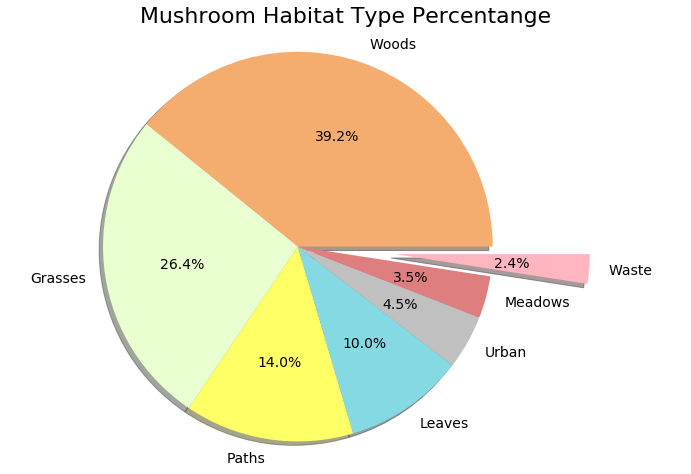

In [20]:
#GET THE HABITAT TYPE AND ITS VALUES ON A SINGLE PIE CHART

habitats = Train['habitat'].value_counts()
hab_size = habitats.values
hab_types = habitats.axes[0]
print(habitats)

# Data to plot

hab_labels = 'Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'
colors = ['#F5AD6F','#EAFFD0','#FFFF66','#84D9E2','#C0C0C0','#DE7E7E', '#FFB6C1']

# Plot

fig = plt.figure(figsize=(12,8))
plt.title('Mushroom Habitat Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(hab_size, explode=(0, 0, 0, 0, 0, 0,0.5), labels=hab_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=360)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

[1338, 975, 95, 156, 67, 175, 139]
[889, 525, 703, 412, 189, 23, 0]
[1338, 889, 975, 525, 95, 703, 156, 412, 67, 189, 175, 23, 139, 0]


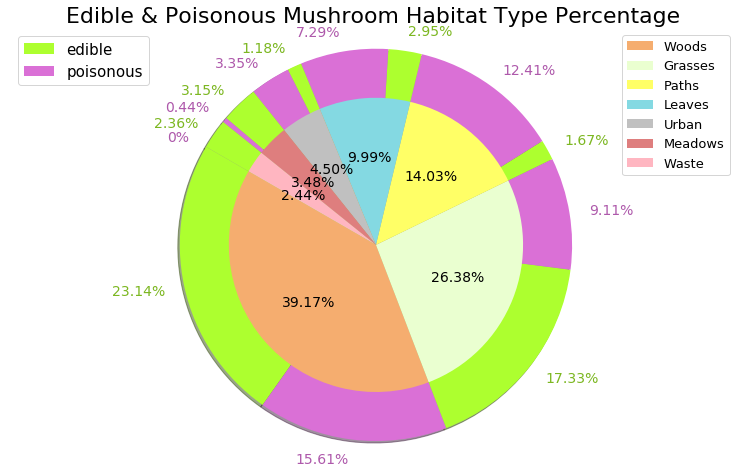

In [21]:
#COMPARING QUANTITIES OF EDIBLE AND POISIONOUS MUSHROOMS BASED ON THEIR HABITAT TYPE ON A DOUBLE PIE CHART

poisonous_hab = []
edible_hab = []    

for hab in hab_types: 
    size = len(Train[Train['habitat'] == hab].index)
    edibles = len(Train[(Train['habitat'] == hab) & (Train['class'] == 'e')].index)
    edible_hab.append(edibles) 
    poisonous_hab.append(size-edibles) 
combine_ed_poi = []

for i in range(0,len(edible_hab)): #Combines both edible and poisonous in a single list. 
    combine_ed_poi.append(edible_hab[i])
    combine_ed_poi.append(poisonous_hab[i])
print(edible_hab) 
print(poisonous_hab) 
print(combine_ed_poi)

#Preparations for DOUBLE pie chart.

fig = plt.subplots(figsize=(13,8))
plt.title('Edible & Poisonous Mushroom Habitat Type Percentage', fontsize=22)
percentages_e_p = ['23.14%','15.61%','17.33%', '9.11%','1.67%','12.41%','2.95%','7.29%','1.18%','3.35%',
                  '3.15%','0.44%','2.36%','0%'] #Percetanges for edible and poisonous

#First pie
patches1, texts1= plt.pie(combine_ed_poi,radius = 2, labels=percentages_e_p,
                                colors=['#ADFF2F','#DA70D6'], shadow=True, startangle=150)
for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#7CB721') 
    else:
        texts1[i].set_color('#AE59AB') 
    texts1[i].set_fontsize(14)         


#Second pie
patches2, texts2, autotexts2 = plt.pie(hab_size, colors=colors, radius = 1.5,
        autopct='%1.2f%%', shadow=True, startangle=150,labeldistance= 2.2)

for aut in autotexts2:
    aut.set_fontsize(14) 
    aut.set_horizontalalignment('center') 

#Set 2 Legends to the plot.
first_legend   = plt.legend(patches1, ['edible','poisonous'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, hab_labels, loc="best",fontsize=13)
plt.gca().add_artist(first_legend) #To display two legends

#Align both pie charts in the same position
plt.axis('equal')
plt.show()


Mushrooms with habitat 'waste' are edible. Urban, leaves or path mushrooms are mostly poisionous. And if you ever go out to the woods or find a mushroom in the grass there is always the probability that it might not be edible.


In [22]:
#Encoding all object values of features to numerical values in order to perform mathematical operations
# and design a classification model

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in Train.columns:
    Train[col]=labelencoder.fit_transform(Train[col])
    
Train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,2,2,0,7,1,0,1,0,...,1,6,7,2,25,1,0,7,4,2
1,1,5,3,8,1,6,1,0,1,4,...,2,7,7,2,30,1,4,3,4,5
2,0,2,2,4,1,5,1,0,0,1,...,2,2,2,2,24,2,0,7,1,6
3,1,5,2,2,0,8,1,0,1,0,...,2,6,7,2,68,1,0,7,4,2
4,0,5,2,8,1,3,1,0,0,5,...,2,7,7,2,23,1,4,3,3,3


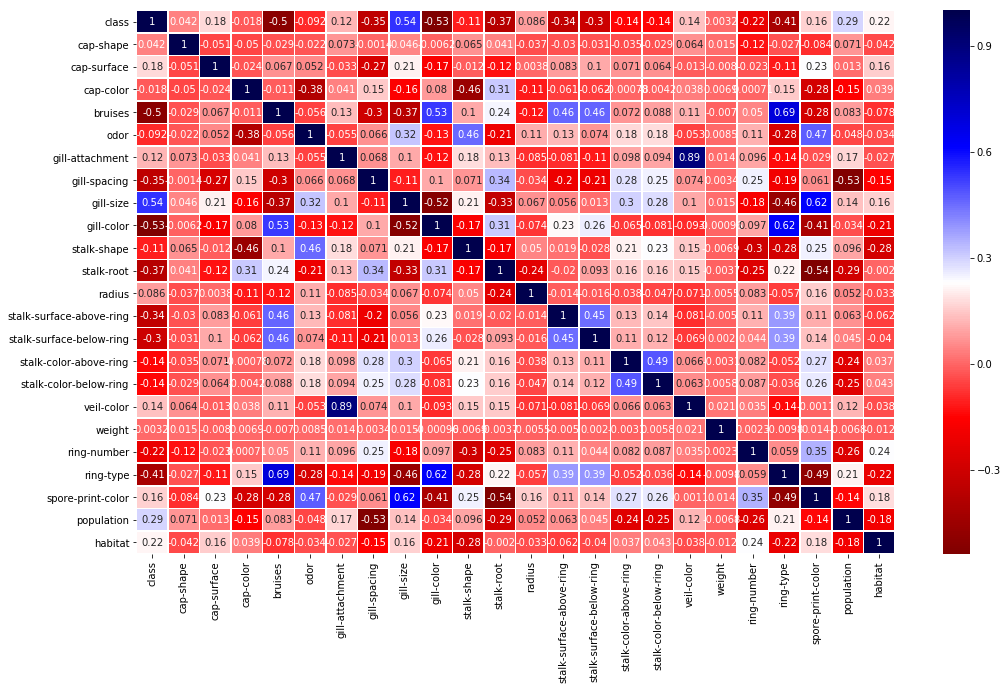

In [23]:
#Plotting heatmap of correlation between features as shown the blue colour shows psitive vlues where colour intesity
# is represents magnitude as dark blue means correlation value near to one and red shade shows negative values

plt.figure(figsize=(17,10))
sns.heatmap(Train.corr(),annot=True,cmap='seismic_r',linewidths=.5)
plt.show()

In [24]:
#separating features and class

X=Train.iloc[:,1:]
Y=Train.iloc[:,0]
Y.head()

0    1
1    1
2    0
3    1
4    0
Name: class, dtype: int64

In [25]:
#converting the numerical values on a standard scale

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
X


array([[-0.84987307,  0.1365854 , -0.98555918, ...,  1.42310421,
         0.27747709,  0.28920903],
       [ 1.02265791,  0.94810532,  1.37364212, ..., -0.2552511 ,
         0.27747709,  2.02874626],
       [-0.84987307,  0.1365854 , -0.19915874, ...,  1.42310421,
        -2.13496136,  2.608592  ],
       ..., 
       [ 1.02265791, -1.48645446, -0.59235896, ..., -0.67483993,
         0.27747709, -0.87048246],
       [-0.84987307,  0.1365854 , -0.19915874, ...,  1.42310421,
         0.27747709,  1.44890051],
       [-2.09822706,  0.1365854 ,  1.37364212, ..., -0.2552511 ,
        -0.52666906,  0.86905477]])

# USING DIMESIONALITY REDUCTION ALGORITHM - PRINCIPLE COMPONENT ANALYSIS (PCA)

In [26]:
from sklearn.decomposition import PCA
pca= PCA()
x=pca.fit_transform(X)
x

array([[ 3.56446017, -0.86100233,  0.45866478, ...,  0.16602752,
         0.07010572,  0.07452528],
       [-0.68080955, -0.88199627, -1.1647806 , ..., -0.09059908,
        -0.14837095, -0.03913354],
       [ 0.88060397, -0.07958656,  0.61090778, ..., -0.60022821,
        -0.53991635,  0.12016299],
       ..., 
       [-1.02995918, -0.28683992, -0.05195817, ..., -0.50925783,
         0.16209144, -0.51783908],
       [ 3.50393681, -0.5128352 ,  0.02664842, ...,  0.04745263,
         0.07397589,  0.04858157],
       [-2.75210745, -0.22395262, -1.18127762, ...,  0.25738631,
         0.2172036 ,  0.2408249 ]])

PCA has reduced the 23 features(dimensions) to 23 principle components and now lets observe which principle components carry least data and can be dropped

In [27]:
#getting covariance of the features

covar=pca.get_covariance() 
covar

array([[  1.00017590e+00,  -5.05158591e-02,  -4.95333689e-02,
         -2.85802302e-02,  -2.16547636e-02,   7.34297571e-02,
         -1.36663685e-03,   4.60210816e-02,  -6.24605239e-03,
          6.54198216e-02,   4.14567689e-02,  -3.66061304e-02,
         -2.97608102e-02,  -3.13387725e-02,  -3.50439859e-02,
         -2.91860901e-02,   6.40371551e-02,   1.48929064e-02,
         -1.23715534e-01,  -2.68934850e-02,  -8.42927913e-02,
          7.09357818e-02,  -4.24972947e-02],
       [ -5.05158591e-02,   1.00017590e+00,  -2.36453463e-02,
          6.67873583e-02,   5.16455723e-02,  -3.34563244e-02,
         -2.74664659e-01,   2.07817121e-01,  -1.67385794e-01,
         -1.24959581e-02,  -1.24145853e-01,   3.80749376e-03,
          8.26072809e-02,   9.96980520e-02,   7.05831691e-02,
          6.40026406e-02,  -1.34468435e-02,  -8.02015431e-03,
         -2.32873278e-02,  -1.13164179e-01,   2.31505926e-01,
          1.29459436e-02,   1.58067059e-01],
       [ -4.95333689e-02,  -2.36453463e-02

In [28]:
#getting explained variance and explained variance ratio of the features

exp_var_ratio=pca.explained_variance_ratio_ 
exp_var_ratio

array([ 0.16888245,  0.11341827,  0.10495742,  0.09482415,  0.07430606,
        0.06297783,  0.04391249,  0.04323018,  0.04174801,  0.03720589,
        0.03350604,  0.03101789,  0.02496904,  0.02359241,  0.0221461 ,
        0.02064244,  0.01695222,  0.01356018,  0.0097487 ,  0.00682736,
        0.00568219,  0.00319069,  0.00270201])

In [29]:
#getting cumulative sum of explained variance ratio for plotting step graph

cum_exp_var_ratio=np.cumsum(exp_var_ratio)
cum_exp_var_ratio

array([ 0.16888245,  0.28230072,  0.38725814,  0.48208229,  0.55638834,
        0.61936617,  0.66327866,  0.70650884,  0.74825685,  0.78546273,
        0.81896877,  0.84998666,  0.8749557 ,  0.89854811,  0.92069421,
        0.94133665,  0.95828887,  0.97184905,  0.98159774,  0.9884251 ,
        0.9941073 ,  0.99729799,  1.        ])

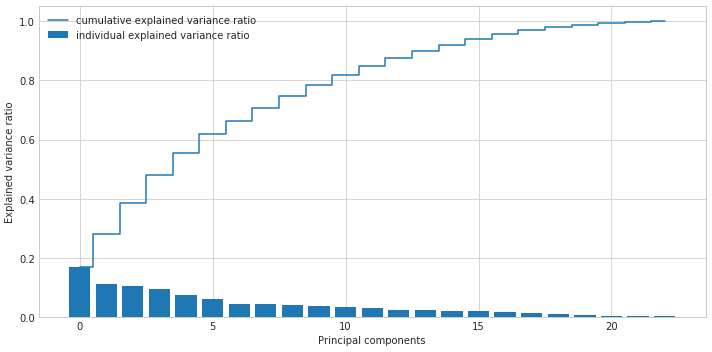

In [30]:
# plotting step and bar graph for cumulative explained ratio to check which principle 
#component contributes how much to data

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 5))

    plt.bar(range(23), exp_var_ratio, alpha=1, align='center',
            label='individual explained variance ratio')
    plt.step(range(23), cum_exp_var_ratio, where='mid',
             label='cumulative explained variance ratio')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


Its clearly visible from the plot that last 5 principle component's contribution to variance is negligible.
After principle component number 18 the cumulative explained variance ratio increment is neglible.
Therefore lets select first 19 priciple components.

In [31]:
#Getting 19 principle components using  PCA

pca2=PCA(n_components=19)
x_19d=pca2.fit_transform(X)
x_19d.shape

(5686, 19)

In [32]:
#Applying KMeans on PCA projection data(19 principle points)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=5) # Set a 2 KMeans clustering
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_19d)

In [33]:
#making a Data Frame of X_clustered and first three principle components

X_19D=pd.DataFrame(x_19d)
X_19D=X_19D[[0,1,2]]
X_19D["X_cluster"]= X_clustered
X_19D.head()

,0,1,2,X_cluster
0,3.564460,-0.861002,0.458665,0
1,-0.680810,-0.881996,-1.164781,1
2,0.880604,-0.079587,0.610908,1
3,3.729842,-0.830612,0.501225,0
4,-1.887491,-0.263841,-1.103834,1


# PLOTTING A PAIRPLOT BETWEEN THE FIRST THREE PRINCIPLE   COMPONENTS OF PCA

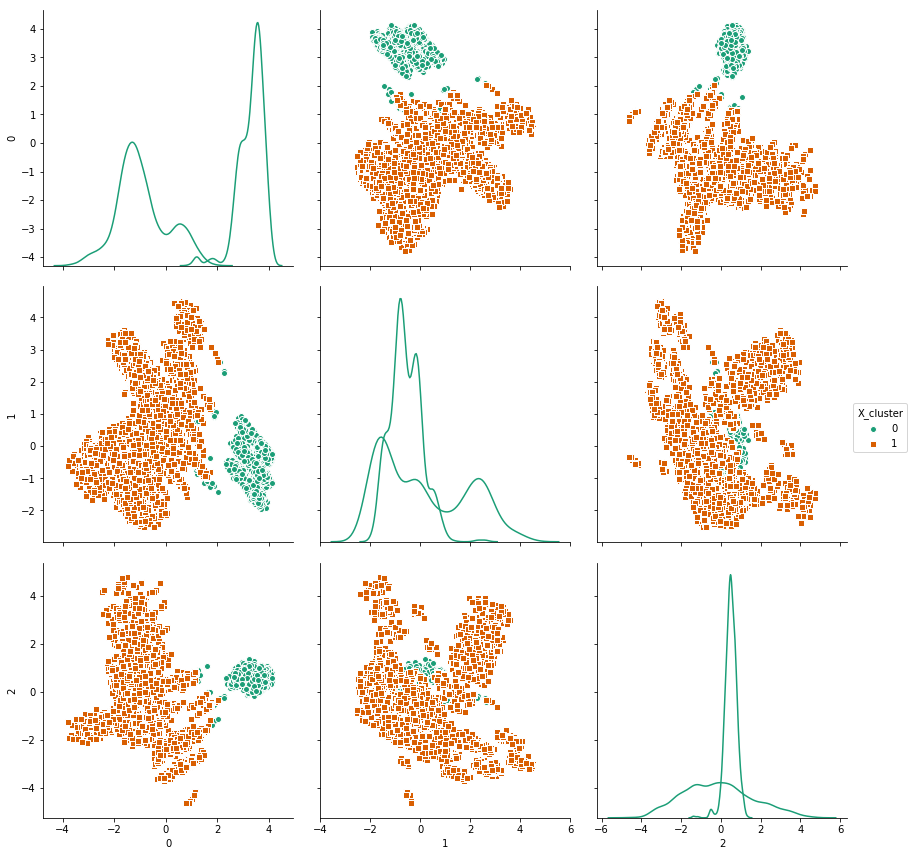

In [34]:
sns.pairplot(X_19D,vars=[0,1,2], hue='X_cluster',markers=['o','s'], palette= 'Dark2', diag_kind='kde',size=4)

As clearly visible from above pairplot first two principle components(0 and 1) do carry most of the information as clusters of original data(19 principle points) in graphs between them(PC 0 & 1) are clearly visible also these clusters are well separated in graphs of principle componenets (0 & 2). while the clusters are not clear in graph between principle points 1 and 2.

In [35]:
#splitting the train data into 80:20 ratio of train and test data to be use for 
#training and testing of classification model.

from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.2,random_state=4)

# IMPORTING EIGHT CLASSIFICATION MODELS TO CHECK THEIR PERFOMANCE ON THE CLASSIFICATION PROBLEM

In [36]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# TRAINING ALL THE MODELS ON PROBLEM DATA AND SELECTING THEM ON THE BASIS OF THEIR ACCURACY ON TRAIN AND TEST DATA

In [37]:
logreg = LogisticRegression() 
logreg.fit(X_Train, Y_Train)
log_pred = logreg.predict(X_Test)
log_pred
acc_log = round(logreg.score(X_Train, Y_Train) * 100,3)
acc_log



96.768000000000001

In [38]:
acc_log2 = round(logreg.score(X_Test, Y_Test) * 100,3)
acc_log2

96.134

In [39]:
svc = SVC()
svc.fit(X_Train, Y_Train)
svc_pred = svc.predict(X_Test)
acc_svc = round(svc.score(X_Train, Y_Train) * 100, 2)
acc_svc

100.0

In [40]:
acc_svc2 = round(svc.score(X_Test, Y_Test) * 100,3)
acc_svc2

100.0

In [41]:
gaussian = GaussianNB()
gaussian.fit(X_Train, Y_Train)
gnb_pred = gaussian.predict(X_Test)
acc_gaussian = round(gaussian.score(X_Train, Y_Train) * 100, 2)
acc_gaussian

92.900000000000006

In [42]:
acc_gaussian2 = round(gaussian.score(X_Test, Y_Test) * 100,3)
acc_gaussian2

93.584999999999994

In [43]:
perceptron = Perceptron()
perceptron.fit(X_Train, Y_Train)
per_pred = perceptron.predict(X_Test)
acc_perceptron = round(perceptron.score(X_Train, Y_Train) * 100, 2)
acc_perceptron

/home/nikesh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


91.030000000000001

In [44]:
acc_perceptron2 = round(perceptron.score(X_Test, Y_Test) * 100,3)
acc_perceptron2

91.125

In [45]:
linear_svc = LinearSVC()
linear_svc.fit(X_Train, Y_Train)
lin_pred = linear_svc.predict(X_Test)
acc_linear_svc = round(linear_svc.score(X_Train, Y_Train) * 100, 2)
acc_linear_svc

95.890000000000001

In [46]:
acc_linear_svc2 = round(linear_svc.score(X_Test, Y_Test) * 100,3)
acc_linear_svc2

96.308999999999997

In [47]:
sgd = SGDClassifier()
sgd.fit(X_Train, Y_Train)
sgd_pred = sgd.predict(X_Test)
acc_sgd = round(sgd.score(X_Train, Y_Train) * 100, 2)
acc_sgd

/home/nikesh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


92.5

In [48]:
acc_sgd2 = round(sgd.score(X_Test, Y_Test) * 100,3)
acc_sgd2

91.125

In [49]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_Train, Y_Train)
dec_pred = decision_tree.predict(X_Test)
acc_decision_tree = round(decision_tree.score(X_Train, Y_Train) * 100, 2)
acc_decision_tree

100.0

In [50]:
acc_decision_tree2 = round(decision_tree.score(X_Test, Y_Test) * 100,3)
acc_decision_tree2

100.0

In [51]:
# FORMING A TABLE TO SHOW ACUURACY ON TRAIN AND TEST DATA FOR DIFFERENT MODELS
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Decision Tree' , 'Logistic Regression', 
               'Linear SVC' , 'Naive Bayes' , 'Stochastic Gradient Decent', 'Perceptron', 
                
              ],
    'Score1(Training_data)': [acc_svc ,acc_decision_tree , acc_log, acc_linear_svc,
               acc_gaussian , acc_sgd , acc_perceptron, 
               ] ,

    'Score2(Test_data)': [acc_svc2 ,acc_decision_tree2 , acc_log2, acc_linear_svc2,
               acc_gaussian2 , acc_sgd2 , acc_perceptron2, 
               ] })
models.sort_values(by='Score1(Training_data)', ascending=False)

,Model,Score1(Training_data),Score2(Test_data)
0,Support Vector Machines,100.000,100.000
1,Decision Tree,100.000,100.000
2,Logistic Regression,96.768,96.134
3,Linear SVC,95.890,96.309
4,Naive Bayes,92.900,93.585
5,Stochastic Gradient Decent,92.500,91.125
6,Perceptron,91.030,91.125


FROM TABLE DATA: SUPPORT VECTOR MACHINES AND DECISION TREE ARE BEST PERFORMING MODELS ON OUR PROBLEM. SO LETS PREDICT THE CLASSES OF THE GIVEN DATA USING THESE MODELS.

In [52]:
#IMPORTING TEST DATA

Test=pd.read_csv("/home/nikesh/Documents/missionDSG/mushroom_test.csv")
Test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,x,f,g,t,n,f,c,b,u,t,...,p,g,p,w,23,o,p,k,y,d
1,x,y,g,f,f,f,c,b,g,e,...,b,b,p,w,23,o,l,h,v,d
2,b,s,w,t,a,f,c,b,w,e,...,w,w,p,w,24,o,p,k,s,m
3,f,y,y,f,f,f,c,b,p,e,...,n,b,p,w,53,o,l,h,y,d
4,b,y,y,t,a,f,c,b,w,e,...,w,w,p,w,24,o,p,k,n,m


# ANALYSING THE TEST DATA

[1226  493  371  129  121   98]


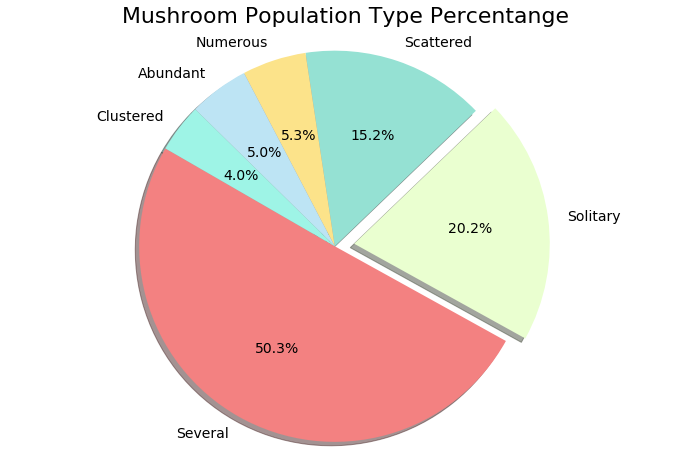

In [53]:
#Get the population types and its values for Single Pie chart

populations = Test['population'].value_counts()
pop_size = populations.values 
pop_types = populations.axes[0]
print(pop_size)

# Data to plot
pop_labels = 'Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'
colors = ['#F38181','#EAFFD0','#95E1D3','#FCE38A','#BDE4F4','#9EF4E6']
fig = plt.figure(figsize=(12,8))

# Plot
plt.title('Mushroom Population Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=(0, 0.1, 0, 0, 0, 0), labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)

for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

d    921
g    648
p    346
l    264
u    112
m     94
w     53
Name: habitat, dtype: int64


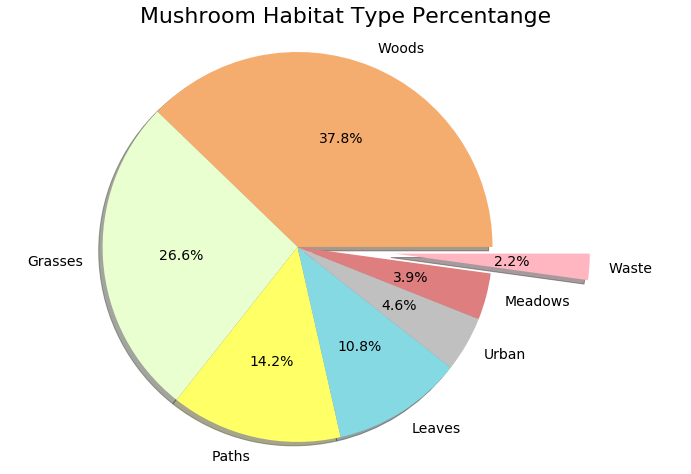

In [54]:
# Get the habitat types and its values for a Single Pie chart

habitats = Test['habitat'].value_counts()
hab_size = habitats.values
hab_types = habitats.axes[0]
print(habitats)

# Data to plot
hab_labels = 'Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'
colors = ['#F5AD6F','#EAFFD0','#FFFF66','#84D9E2','#C0C0C0','#DE7E7E', '#FFB6C1']
fig = plt.figure(figsize=(12,8))

# Plot
plt.title('Mushroom Habitat Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(hab_size, explode=(0, 0, 0, 0, 0, 0,0.5) , labels=hab_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=360)

for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

In [55]:
Test.describe()

,radius,weight
count,2438.000000,2438.000000
mean,165.469647,33.068499
std,159.283525,12.641770
min,1.000000,5.000000
25%,37.000000,23.000000
50%,124.000000,28.000000
75%,238.000000,39.000000
max,873.000000,100.000000


In [56]:
#CHECKING ENTRIES OF VEIL-TYPE
Test["veil-type"].unique()

array(['p'], dtype=object)

VEIL-TYPE HAVE ONLY ONE VALUE = 'P' AS WAS IN TRAIN DATA. THEREFORE WE CAN REMOVE VEIL-TYPE WITHOUT ANY LOSS

In [57]:
#DROPPING VEIL-TYPE FEATURE
Test=Test.drop('veil-type',axis=1)
Test.head()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,x,f,g,t,n,f,c,b,u,t,...,s,p,g,w,23,o,p,k,y,d
1,x,y,g,f,f,f,c,b,g,e,...,k,b,b,w,23,o,l,h,v,d
2,b,s,w,t,a,f,c,b,w,e,...,s,w,w,w,24,o,p,k,s,m
3,f,y,y,f,f,f,c,b,p,e,...,k,n,b,w,53,o,l,h,y,d
4,b,y,y,t,a,f,c,b,w,e,...,s,w,w,w,24,o,p,k,n,m


In [58]:
#ENCODING THE TEST DATA TO NUMERICAL VALUES

for col in Test.columns:
    Test[col]=labelencoder.fit_transform(Test[col])

Test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,4,0,3,1,5,1,0,0,9,1,...,2,6,3,2,7,1,4,2,5,0
1,4,2,3,0,2,1,0,0,2,0,...,1,0,0,2,7,1,2,1,4,0
2,0,1,8,1,0,1,0,0,10,0,...,2,7,7,2,8,1,4,2,3,3
3,1,2,9,0,2,1,0,0,7,0,...,1,4,0,2,37,1,2,1,5,0
4,0,2,9,1,0,1,0,0,10,0,...,2,7,7,2,8,1,4,2,2,3


In [59]:
#FITTING TEST DATA TO THE STANDARD SCALE

Test=scaler.fit_transform(Test)

# NOW WE HAVE PREPROCESSED OUR DATA AND ITS READY TO FEED OUR MODELS AND GET THEIR CLASSES

In [60]:
#PREDICTING THE CLASSES OF TEST DATA USING SUPPORT VECTOR MACHINES
Test_svc_pred=pd.DataFrame(svc.predict(Test))
Test_svc_pred=Test_svc_pred.rename(columns={0:'class'})
Test_svc_pred['class'].value_counts()

0    1263
1    1175
Name: class, dtype: int64

In [61]:
Test_svc_pred.head()

,class
0,0
1,1
2,0
3,1
4,0


In [62]:
#FEEDING DATA TO DECISION TREE TO PREDICT THEIR CLASSES

Test_dec_pred=pd.DataFrame(decision_tree.predict(Test))
Test_dec_pred=Test_dec_pred.rename(columns={0:'class'})
Test_dec_pred['class'].value_counts()

0    1263
1    1175
Name: class, dtype: int64

WE HAVE SAME NUMBERS OF EDIBLE(1263) AND POISIONOUS(1175) MUSHROOMS CLASS PREDICTIONS USING BOTH MODELS. 0 REPRESENTS EDIBLE WHILE 1 REPRESENTS POISIONOUS.

In [63]:
Test_dec_pred.head()

,class
0,0
1,1
2,0
3,1
4,0
